# Spline interpolation

Using cubic splines to interpolate math functions and node sets.

***

## Setup:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import methods

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]

***

## Interpolating $\frac{1}{x}$ on $[1; 2]$ with 6 nodes:

In [4]:
a = 1
b = 2
nodes_num = 6

def hyperbole(x):
    return 1 / x

In [5]:
xs = np.linspace(a, b, nodes_num)
ys = np.array([hyperbole(x) for x in xs])
nodes = [(x, y) for (x, y) in zip(xs, ys)]

print('Interpolation nodes:\n')
for (i, node) in enumerate(nodes):
    x = node[0]
    y = node[1]
    print(f'{i+1}) ({round(x, 4)}, {round(y, 4)})')

Interpolation nodes:

1) (1.0, 1.0)
2) (1.2, 0.8333)
3) (1.4, 0.7143)
4) (1.6, 0.625)
5) (1.8, 0.5556)
6) (2.0, 0.5)


In [6]:
spline_coeffs = methods.spline_coeffs_alpha(nodes)

# a, b, c, d coefficients for each spline
print('Splines\' a, b, c and d coefficients (alpha method):\n')
print(np.array(spline_coeffs))

spline_coeffs = methods.spline_coeffs_beta(nodes)

# a, b, c, d coefficients for each spline
print('\n\nSplines\' a, b, c and d coefficients (beta method):\n')
print(np.array(spline_coeffs))

Splines' a, b, c and d coefficients (alpha method):

[[ 0.83333333 -0.72396901  0.8202324   1.367054  ]
 [ 0.71428571 -0.50182274  0.29049897 -0.88288904]
 [ 0.625      -0.39374003  0.24991456 -0.06764069]
 [ 0.55555556 -0.30416951  0.19793803 -0.08662755]
 [ 0.5        -0.26458191  0.         -0.32989671]]


Splines' a, b, c and d coefficients (beta method):

[[ 0.83333333 -0.72396901  0.8202324   1.367054  ]
 [ 0.71428571 -0.50182274  0.29049897 -0.88288904]
 [ 0.625      -0.39374003  0.24991456 -0.06764069]
 [ 0.55555556 -0.30416951  0.19793803 -0.08662755]
 [ 0.5        -0.26458191  0.         -0.32989671]]


In [7]:
splines = methods.splines_alpha(nodes)

for spline in splines:
    methods.latex_print(spline)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
def plot_splines(xs, ys, splines, true_func=None, show_nodes=True):
    if show_nodes:
        plt.scatter(xs, ys)

    nodes_num = len(nodes)

    spline_domains = [np.linspace(xs[i], xs[i+1], 20) for i in range(nodes_num - 1)]

    for (i, (spline, domain)) in enumerate(zip(splines, spline_domains)):
        plt.plot(domain, spline(domain - xs[i+1]))

    if true_func:
        full_domain = np.linspace(xs[0], xs[-1], 20*(nodes_num - 1))
        plt.plot(full_domain, true_func(full_domain), color='black', linestyle='dashed', label='f(x)')
        plt.legend()

    plt.show()

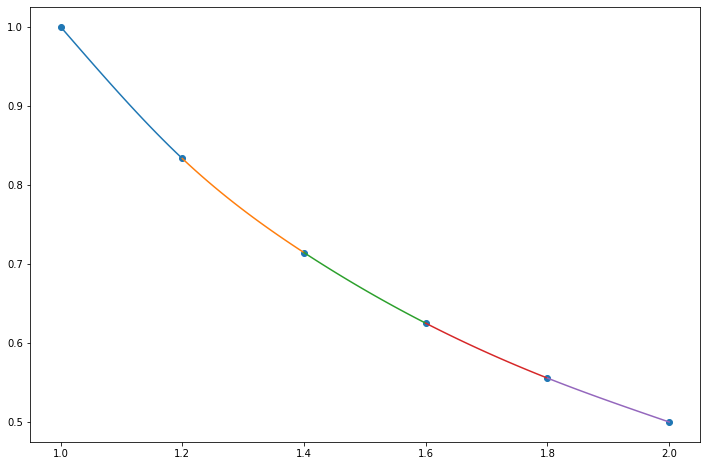

In [9]:
plot_splines(xs, ys, splines)

## Plotting 1st and 2nd derivatives to show continuousity:

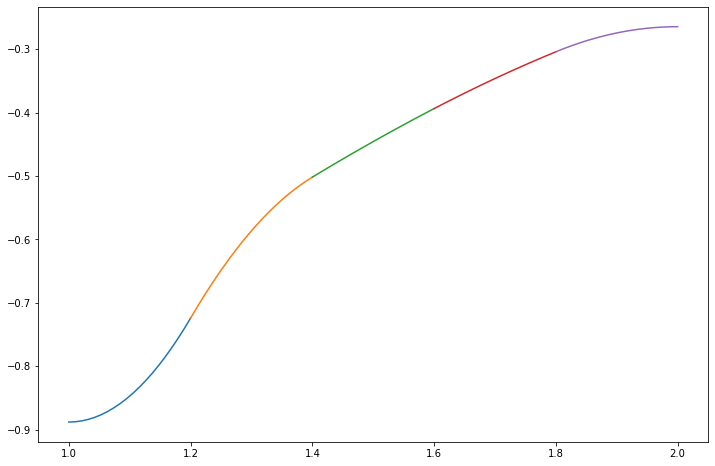

In [10]:
plot_splines(xs, ys, [spline.deriv() for spline in splines], show_nodes=False)

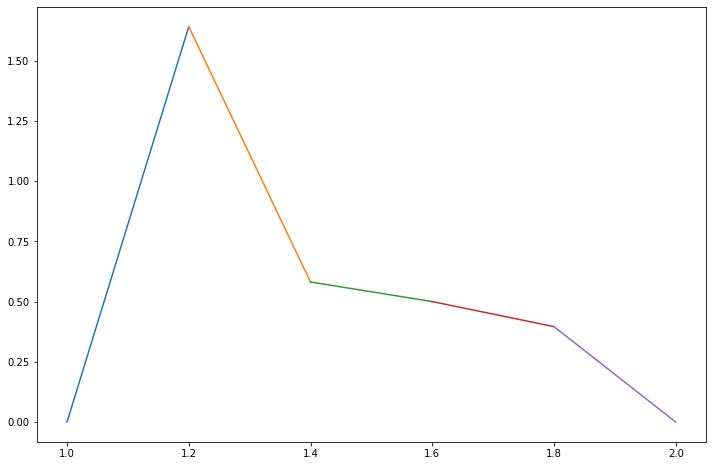

In [11]:
plot_splines(xs, ys, [spline.deriv(2) for spline in splines], show_nodes=False)

## $f(x)$ and approximation comparison:

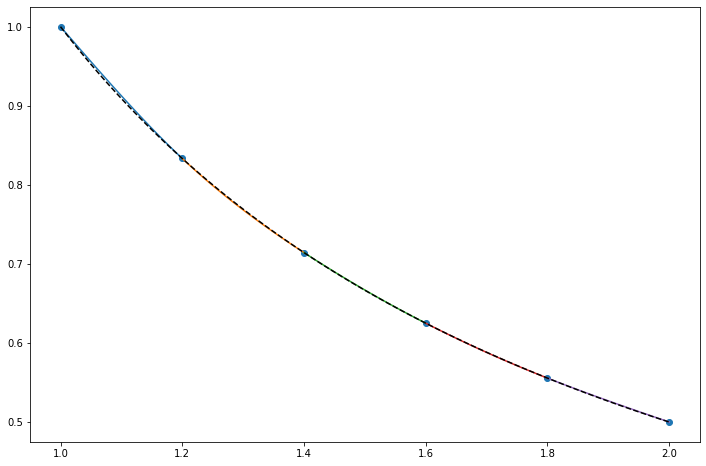

In [13]:
plot_splines(xs, ys, splines, true_func=hyperbole)

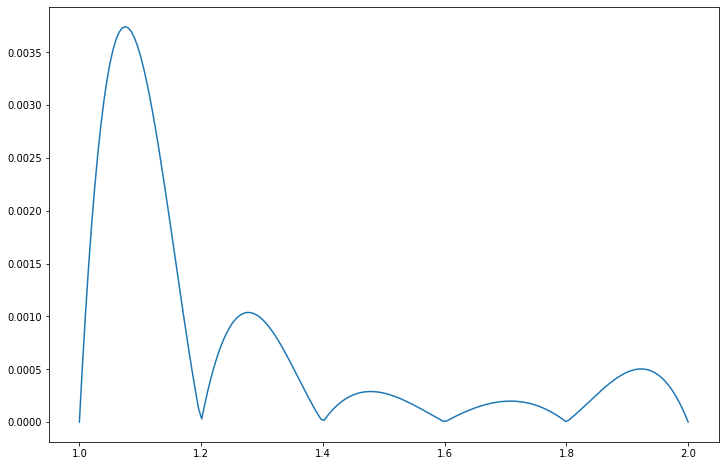

In [11]:
approx = methods.approx_beta(nodes)
domain = np.linspace(xs[0], xs[-1], 200)
plt.plot(domain, [abs(hyperbole(x) - approx(x)) for x in domain], label='error function')
plt.legend()
plt.show()

## Evaluating interpolation in $x_0 = \frac{a+b}{2}$:

In [14]:
x0 = (a+b) / 2

y01 = hyperbole(x0)
desired_spline = splines[2]
y02 = desired_spline(x0 - xs[3])

print(f'x0 = (a+b) / 2 = {x0}\n')
print(f'1/x at x={x0} is {y01}')
print(f'splines({x0}) = {y02}')
print(f'diff = {abs(y01-y02)}')

x0 = (a+b) / 2 = 1.5

1/x at x=1.5 is 0.6666666666666666
splines(1.5) = 0.6669407894736842
diff = 0.00027412280701755165


## Error function when using 24 nodes:

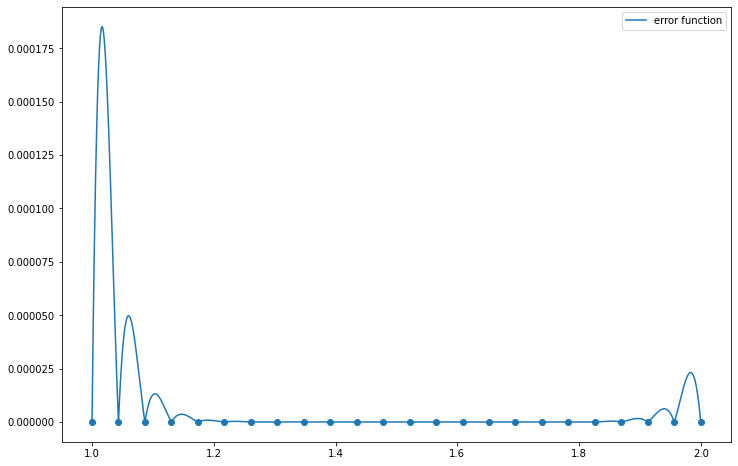

In [18]:
nodes_num = 24

xs = np.linspace(a, b, nodes_num)
ys = np.array([hyperbole(x) for x in xs])
nodes = [(x, y) for (x, y) in zip(xs, ys)]

approx = methods.approx_beta(nodes)
domain = np.linspace(xs[0], xs[-1], 2000)

plt.scatter(xs, [0 for _ in xs])

plt.plot(domain, [abs(hyperbole(x) - approx(x)) for x in domain], label='error function')
plt.legend()
plt.show()

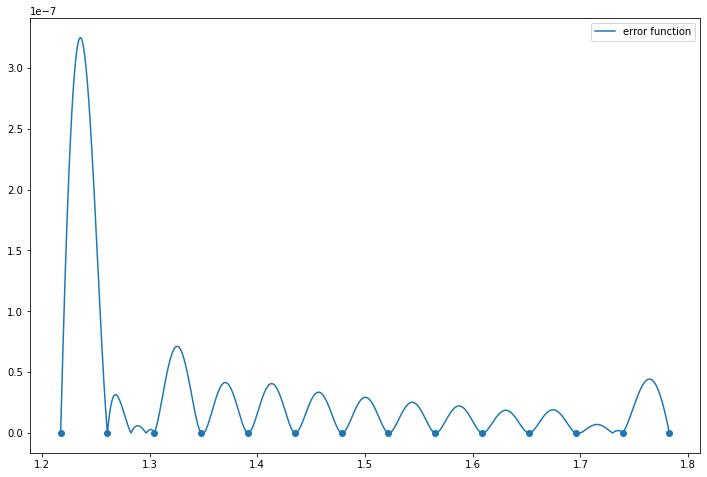

In [20]:
domain = np.linspace(xs[5], xs[-6], 2000)

plt.scatter(xs[5:-5], [0 for _ in xs[5:-5]])

plt.plot(domain, [abs(hyperbole(x) - approx(x)) for x in domain], label='error function')
plt.legend()
plt.show()

***

## Interpolating a random node set with differently spaced intervals:

In [16]:
nodes = [(-15, 0), (-12, 3), (-6, -1), (-5, 1), (-1, 10), (2, 4), (4, 6), (6, 8), (9, -1), (11, 6), (15, 8)]
xs = [node[0] for node in nodes]
ys = [node[1] for node in nodes]

In [18]:
spline_coeffs = methods.spline_coeffs_alpha(nodes)
print(np.array(spline_coeffs), '\n\n')

spline_coeffs = methods.spline_coeffs_beta(nodes)
print(np.array(spline_coeffs))

[[ 3.         -0.06304904 -0.53152452 -0.05905828]
 [-1.          1.3152452   0.76124023  0.07182026]
 [ 1.          2.60826936  0.53178393 -0.07648543]
 [10.         -0.59367446 -1.33226989 -0.15533782]
 [ 4.         -0.81584142  1.25821423  0.28783157]
 [ 6.          2.11525437  0.20733366 -0.17514676]
 [ 8.         -1.64517605 -2.08754887 -0.38248042]
 [-1.          0.55299871  2.82027379  0.54531363]
 [ 6.          3.75345502 -1.22004563 -0.67338657]
 [ 8.         -1.12672751  0.          0.10167047]] 


[[ 3.         -0.06304904 -0.53152452 -0.05905828]
 [-1.          1.3152452   0.76124023  0.07182026]
 [ 1.          2.60826936  0.53178393 -0.07648543]
 [10.         -0.59367446 -1.33226989 -0.15533782]
 [ 4.         -0.81584142  1.25821423  0.28783157]
 [ 6.          2.11525437  0.20733366 -0.17514676]
 [ 8.         -1.64517605 -2.08754887 -0.38248042]
 [-1.          0.55299871  2.82027379  0.54531363]
 [ 6.          3.75345502 -1.22004563 -0.67338657]
 [ 8.         -1.12672751  

In [20]:
splines = methods.splines_beta(nodes)

for spline in splines:
    methods.latex_print(spline)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

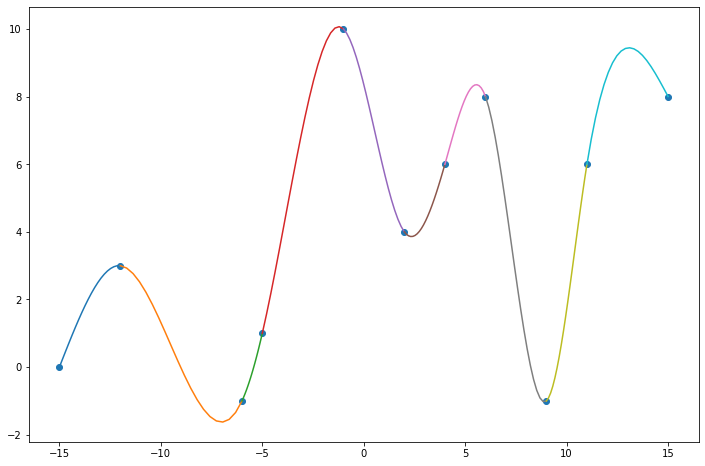

In [21]:
plot_splines(xs, ys, splines)

***

## 